In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

350  images to be resized.
350  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
print("바위 이미지 resize 완료!")

350  images to be resized.
350  images resized.
바위 이미지 resize 완료!


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

# 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
print("보 이미지 resize 완료!")

350  images to be resized.
350  images resized.
보 이미지 resize 완료!


In [5]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [6]:
import numpy as np

def load_data(img_path, number_of_data=1350):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1050 입니다.
x_train shape: (1350, 56, 56, 3)
y_train shape: (1350,)


라벨:  0


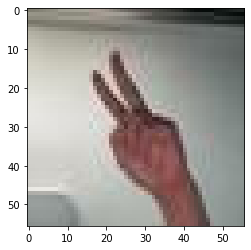

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6])
print('라벨: ', y_train[6])

In [94]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random

seed_num = 42
random.seed(seed_num)
os.environ["PYTHONHASHSEED"] = str(seed_num)
tf.random.set_seed(seed_num)
np.random.seed(seed_num)

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 
# MNIST 데이터셋과 어떤 점이 달라졌나요?

n_channel_1 = 32
n_channel_2 = 64
n_dense= 64
n_train_epochs = 40

model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(56, 56, 3)))
model.add(keras.layers.Conv2D(n_channel_1, (4,4), activation='relu',))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(n_channel_2, (4,4), activation='relu'))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_22 (Rescaling)     (None, 56, 56, 3)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 53, 53, 32)        1568      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 4, 4, 64)        

In [95]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = n_train_epochs)

Epoch 1/40
43/43 [==============================] - 1s 6ms/step - loss: 1.0932 - accuracy: 0.4437
Epoch 2/40
43/43 [==============================] - 0s 6ms/step - loss: 0.8511 - accuracy: 0.5021
Epoch 3/40
43/43 [==============================] - 0s 6ms/step - loss: 0.7929 - accuracy: 0.5969
Epoch 4/40
43/43 [==============================] - 0s 6ms/step - loss: 0.6076 - accuracy: 0.7536
Epoch 5/40
43/43 [==============================] - 0s 6ms/step - loss: 0.4989 - accuracy: 0.7936
Epoch 6/40
43/43 [==============================] - 0s 6ms/step - loss: 0.4020 - accuracy: 0.8425
Epoch 7/40
43/43 [==============================] - 0s 6ms/step - loss: 0.3484 - accuracy: 0.8663
Epoch 8/40
43/43 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.8985
Epoch 9/40
43/43 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.8819
Epoch 10/40
43/43 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.9203
Epoch 11/40
43/43 [

In [96]:

test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(test_dir_path, 300)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 56, 56, 3)
y_test shape: (300,)


In [97]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.6077 - accuracy: 0.6200
test_loss: 1.6076804399490356 
test_accuracy: 0.6200000047683716


In [98]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.7523632  0.21814395 0.02949288]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


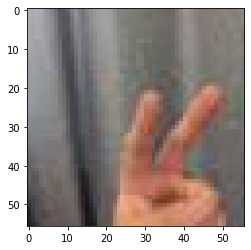

In [99]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.02301999 0.87021416 0.10676578]
라벨: 2, 예측결과: 1


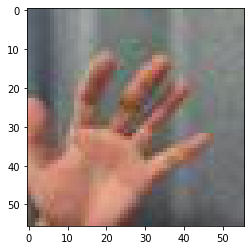

예측확률분포: [7.3111529e-04 9.8636222e-01 1.2906677e-02]
라벨: 0, 예측결과: 1


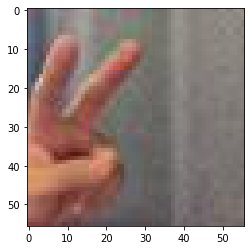

예측확률분포: [4.1676663e-02 2.1446100e-04 9.5810884e-01]
라벨: 0, 예측결과: 2


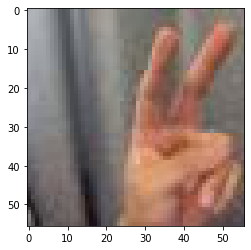

예측확률분포: [0.4347411  0.54932123 0.01593769]
라벨: 0, 예측결과: 1


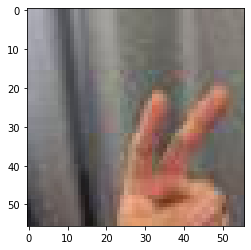

예측확률분포: [0.81377274 0.06840863 0.11781866]
라벨: 2, 예측결과: 0


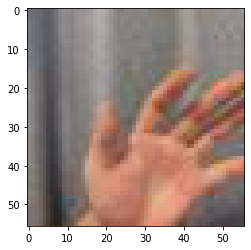

In [100]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()
    
# 가위와 보를 많이 헷갈리는 편